## Gerando conjunto de dados de planetas aleatórios

In [1]:
from geexhp import DataGen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
            "axes.spines.right": False,
            "axes.spines.top": False,
            "font.size": 12,
            "axes.labelsize": 12,
            "axes.titlesize": 12,
            "legend.fontsize": 10,
            "xtick.labelsize": 10,
            "ytick.labelsize": 10,
            "figure.figsize" : (10, 4)
            })

In [2]:
dg = DataGen(url="http://127.0.0.1:3000/api.php")

Testing connection to PSG at http://127.0.0.1:3000/api.php ...
Connected to PSG with success.


In [3]:
dg.gerador(nplanetas=10_000,verbose=True,instrumento="HWC", arq="dados")

Gerando planetas: 100%|██████████| 10000/10000 [tempo restante: 00:00, tempo gasto: 30:21:30]  


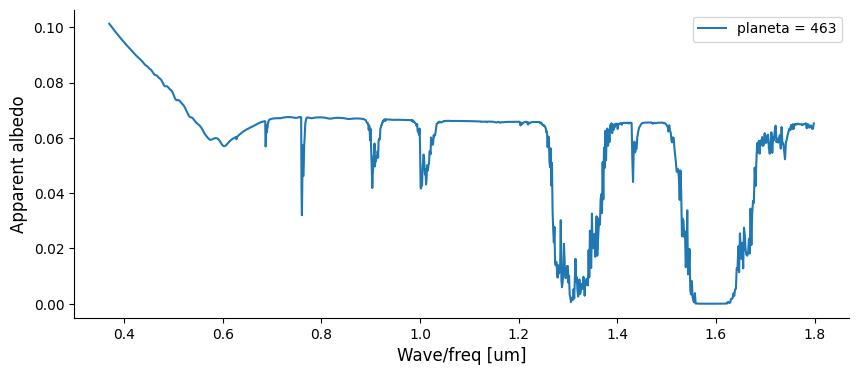

In [39]:
df_rnd = pd.read_parquet("../data/dados.parquet")
indice = np.random.randint(0, len(df_rnd))

wavelength_str = df_rnd.iloc[indice]["WAVELENGHT"]
wavelength = [float(value.strip()) for value in wavelength_str.split(',')]

albedo_str = df_rnd.iloc[indice]["ALBEDO"]
albedo = [float(value.strip()) for value in albedo_str.split(',')]

_, ax = plt.subplots()
ax.plot(wavelength, albedo, label = f"planeta = {indice}")
ax.set(xlabel="Wave/freq [um]", ylabel="Apparent albedo")
plt.legend();